# **Import Libraries**


In [1]:
import numpy as np
import pandas as pd

# Graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Models

import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# **Load dataset**


In [3]:
dataset = pd.read_csv("cardio_train.csv", sep = ";")

In [4]:
df = dataset.copy()

In [5]:
df.drop_duplicates(inplace=True)

# **Getting to know the data**

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


# **Data Transormation**

In [8]:
# Converting the days to years
#df["age"] = df["age"].apply(lambda x: round(x/365))

In [9]:
# Need to determine which gender is male and which is female to draw any conclusions. First convert 1/2 to 0/1.
df["gender"] = df["gender"].apply(lambda x: x-1)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,0.349571,0.476838,0.0,0.00,0.0,1.00,1.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [11]:
df["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [12]:
df["gluc"].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [13]:
"""for column in ["cholesterol", "gluc"]:
  df[column] = df[column].map({1: "normal", 2: "above normal", 3 : "well above normal"})"""

'for column in ["cholesterol", "gluc"]:\n  df[column] = df[column].map({1: "normal", 2: "above normal", 3 : "well above normal"})'

In [14]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,0,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,0,156,56.0,100,60,1,1,0,0,0,0


# **Data Cleaning**

In [15]:
# Define the condition and delete rows
df = df.drop(df[(df["weight"] < 35.0) & (df["height"] > 150)].index)

# Reset the index
df = df.reset_index(drop=True)

In [16]:
# Define the condition and delete rows
df = df.drop(df[(df["ap_lo"] < 60) | (df["ap_lo"] >= 120)].index)

# Reset the index
df = df.reset_index(drop=True)

In [17]:
# Define the condition and delete rows
df = df.drop(df[(df["ap_hi"] < 70) | (df["ap_hi"] >= 200)].index)

# Reset the index
df = df.reset_index(drop=True)

In [18]:
# Define the condition and delete rows
df = df.drop(df[(df["weight"] < 40) & (df["height"] > 160)].index)

# Reset the index
df = df.reset_index(drop=True)

In [19]:
print("Shape before: ", dataset.shape)
print("Shape after: ", df.shape)

Shape before:  (70000, 13)
Shape after:  (68253, 13)


# **Visualization**

In [21]:
df["gender"].value_counts()

0    44468
1    23785
Name: gender, dtype: int64

In [22]:
df[df["cardio"]==1]["gender"].value_counts()

0    21830
1    11835
Name: gender, dtype: int64

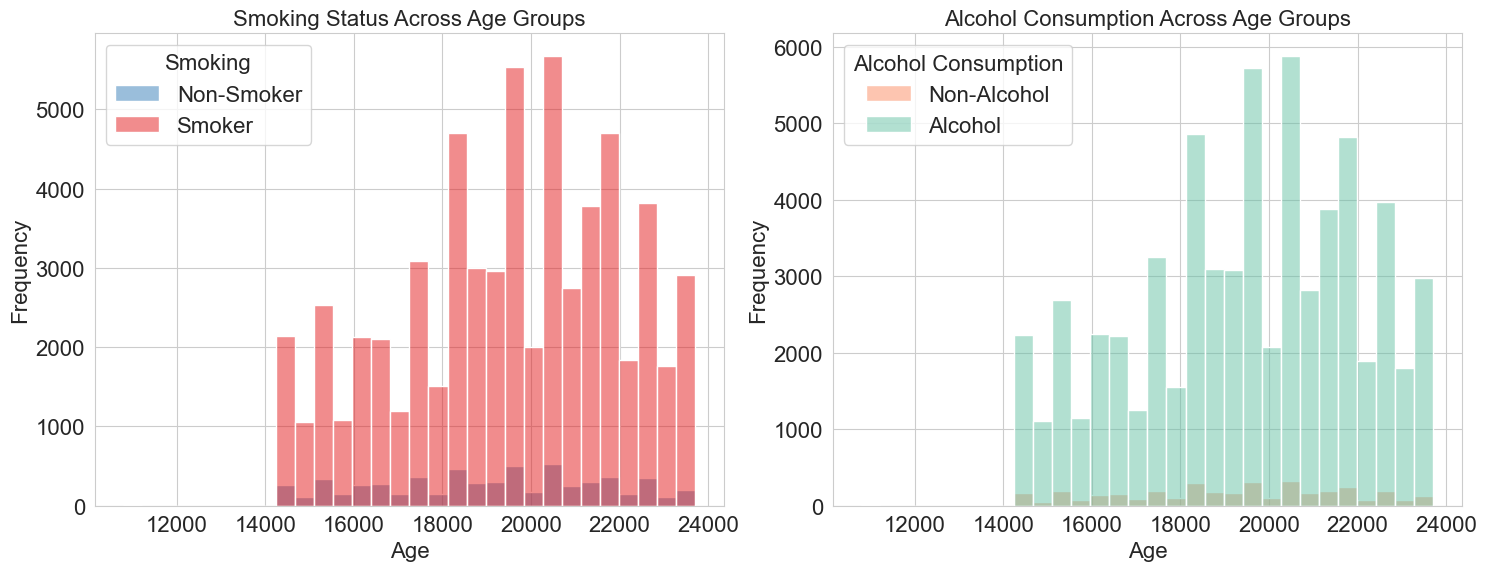

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and font size
sns.set_style("whitegrid")
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for smoking across different age groups
sns.histplot(data=df, x='age', hue='smoke', kde=False, bins=30, palette='Set1', ax=ax1)
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")
ax1.set_title("Smoking Status Across Age Groups")
ax1.legend(title="Smoking", labels=["Non-Smoker", "Smoker"])

# Plot histogram for alcohol consumption across different age groups
sns.histplot(data=df, x='age', hue='alco', kde=False, bins=30, palette='Set2', ax=ax2)
ax2.set_xlabel("Age")
ax2.set_ylabel("Frequency")
ax2.set_title("Alcohol Consumption Across Age Groups")
ax2.legend(title="Alcohol Consumption", labels=["Non-Alcohol", "Alcohol"])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


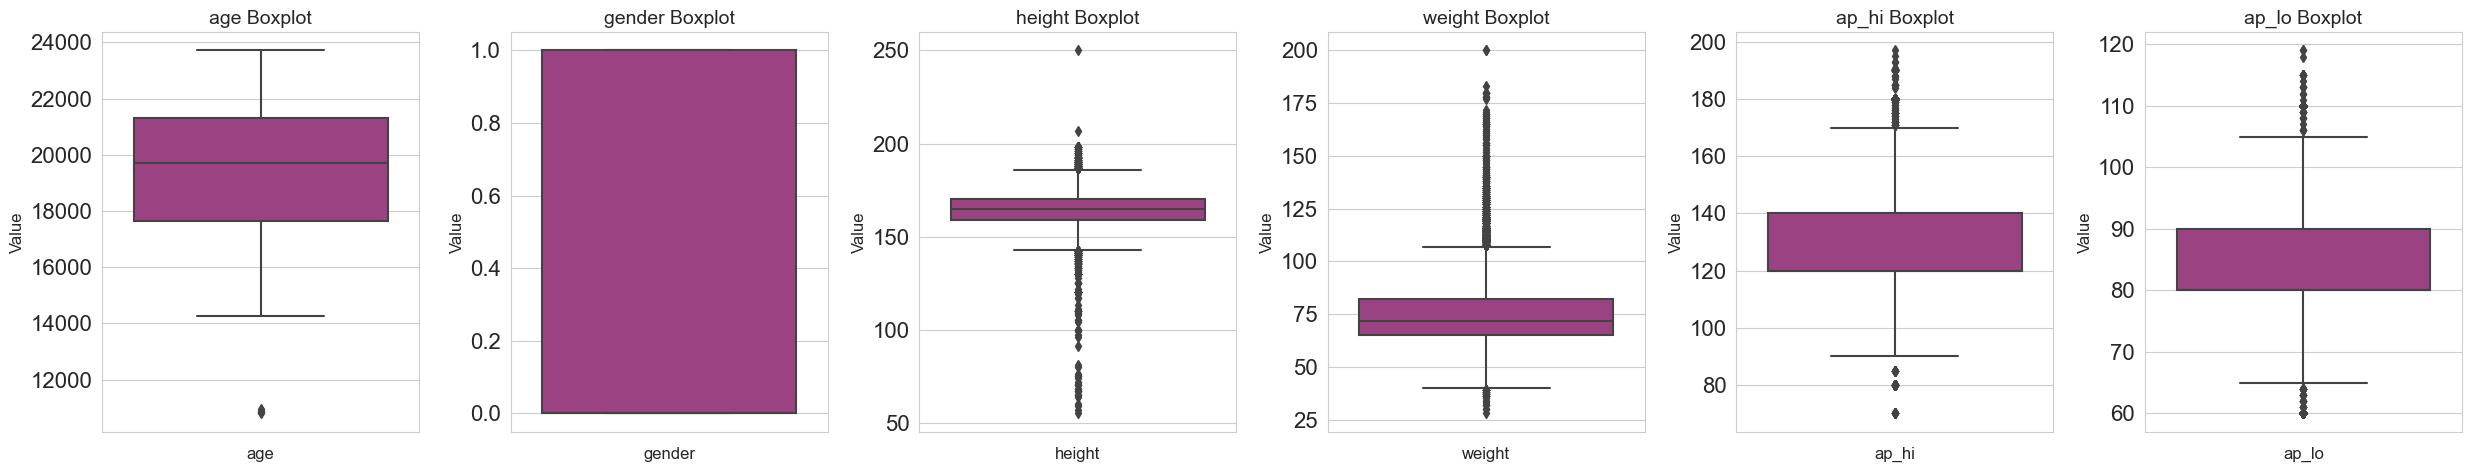

In [24]:
columns_name = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo']
colors = ['#AA3488']

fig, axes = plt.subplots(1, 6, figsize=(25, 5))

for i, column in enumerate(columns_name):
    sns.boxplot(ax=axes[i], y=column, data=df, palette=colors)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)
    axes[i].set_title(column + ' Boxplot', fontsize=14)

plt.tight_layout()
plt.show()

In [25]:
dff=df.select_dtypes(exclude='object')

In [26]:
dff

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,0,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68248,99993,19240,1,168,76.0,120,80,1,1,1,0,1,0
68249,99995,22601,0,158,126.0,140,90,2,2,0,0,1,1
68250,99996,19066,1,183,105.0,180,90,3,1,0,1,0,1
68251,99998,22431,0,163,72.0,135,80,1,2,0,0,0,1


In [27]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [28]:
def outlier_treatment(datacolumn):
    sorted_data = np.sort(datacolumn)  # Convert the list to a NumPy array and then sort
    Q1, Q3 = np.percentile(sorted_data, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Assuming you have the DataFrame 'df' and you want to treat outliers for each column
for col in columns_name:
    lowerbound, upperbound = outlier_treatment(df[col].values)
    df[col] = np.clip(df[col], a_min=lowerbound, a_max=upperbound)

In [31]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

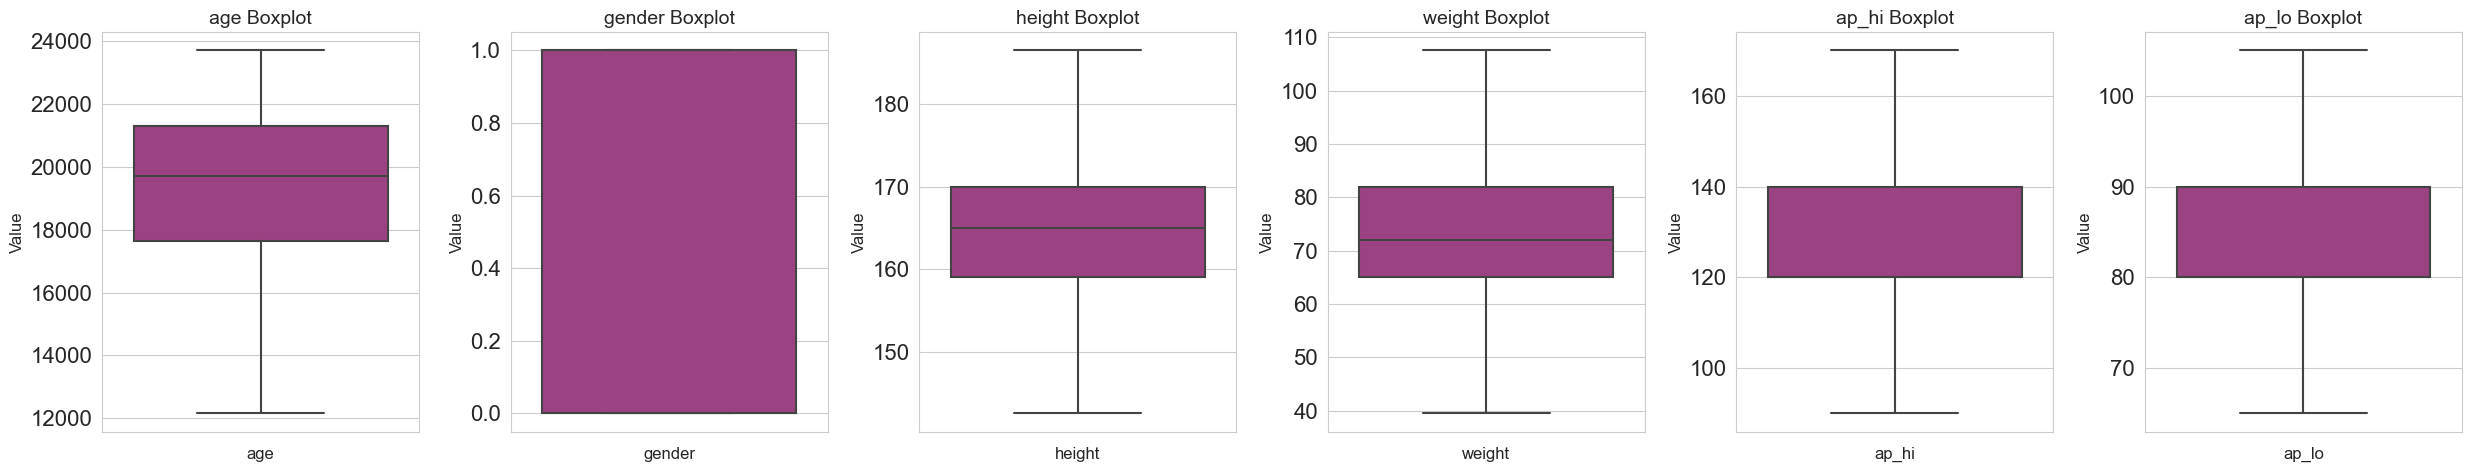

In [32]:
columns_name = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo']
colors = ['#AA3488']

fig, axes = plt.subplots(1, 6, figsize=(25, 5))

for i, column in enumerate(columns_name):
    sns.boxplot(ax=axes[i], y=column, data=df, palette=colors)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Value', fontsize=12)
    axes[i].set_title(column + ' Boxplot', fontsize=14)

plt.tight_layout()
plt.show()

In [33]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

# Transformations

## New feature

### Body Mass Index (BMI)  is a person's weight in kilograms divided by the square of height in meters.

#### For most adults, an ideal BMI is in the 18.5 to 24.9 range.

#### For children and young people aged 2 to 18, the BMI calculation takes into account age and gender as well as height and weight.

##### If your BMI is:

* below 18.5 – you're in the underweight range
* between 18.5 and 24.9 – you're in the healthy weight range
* between 25 and 29.9 – you're in the overweight range
* 30 or over – you're in the obese range

In [34]:
df['bmi'] = df['weight'] / (df['height']/100)**2

In [35]:
# Categorize BMI into different groups based on specific ranges

df['bmiGrp'] = np.where((df.bmi < 18.5), "underweight", "none")
# If BMI is less than 18.5, assign category 1 (underweight), otherwise assign 0

df['bmiGrp'] = np.where((df.bmi >= 18.5) & (df.bmi < 24.9), "healthy", df.bmiGrp)
# If BMI is between 18.5 (inclusive) and 24.9 (exclusive), assign category 2 (normal weight), otherwise keep the existing category value

df['bmiGrp'] = np.where((df.bmi >= 25) & (df.bmi < 29.9), "overweight", df.bmiGrp)
# If BMI is between 25 (inclusive) and 29.9 (exclusive), assign category 3 (overweight), otherwise keep the existing category value

df['bmiGrp'] = np.where((df.bmi >= 30), "obese", df.bmiGrp)
# If BMI is 30 or greater, assign category 4 (obese), otherwise keep the existing category value


In [36]:
bmiGrp = {}
for m in df.groupby(by=['bmiGrp']):
    bmiGrp[ m[0] ] = m[1]['cardio'].mean()
df['bmiGrp'] = df['bmiGrp'].map( bmiGrp ) 
print(df['bmiGrp'].corr(df['cardio']))

0.1826368455866771


In [37]:
df["pulse"]=df["ap_hi"]-df["ap_lo"]
print(df['pulse'].corr(df['cardio']))

0.3507192403488144


### Blood Pressure Categories

* Normal: Below 120
* Elevated: 120-129
* Stage I: high blood pressure (also called hypertension): 130-139
* Stage II: hypertension: 140 or more
* Hypertensive crisis: 180 or more. Call 911.

In [38]:
def blood_pressure_categories(x,y):
    if x<=80 and y<=60:
        return 'Hypotensive'
    elif x<=120 and y<=80:
        return 'Normal'
    elif x<=139 and y<=89:
        return 'Prehypertensive'
    elif x<=159 or y<=99:
        return 'Stage_1'
    elif x<=179 or y<=109:
        return "Stage_2"
    elif x>180 or y>110:
        return 'hypertensive_crisis'
    else:
        return None

In [39]:
df['bpc']=df.apply(lambda x:blood_pressure_categories(x['ap_hi'],x['ap_lo']),axis=1)
"""bpc = {}
for m in df.groupby(by=['bpc']):
    bpc[ m[0] ] = m[1]['cardio'].mean()
df['bpc'] = df['bpc'].map( bpc )   

print(df['bpc'].corr(df['cardio']))
df"""
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmiGrp,pulse,bpc
0,0,18393.0,1,168.0,62.0,110.0,80.0,1,1,0,0,1,0,21.967120,0.394381,30.0,Normal
1,1,20228.0,0,156.0,85.0,140.0,90.0,3,1,0,0,1,1,34.927679,0.622801,50.0,Stage_1
2,2,18857.0,0,165.0,64.0,130.0,70.0,3,1,0,0,0,1,23.507805,0.394381,60.0,Prehypertensive
3,3,17623.0,1,169.0,82.0,150.0,100.0,1,1,0,0,1,1,28.710479,0.504048,50.0,Stage_1
4,4,17474.0,0,156.0,56.0,100.0,65.0,1,1,0,0,0,0,23.011177,0.394381,35.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68248,99993,19240.0,1,168.0,76.0,120.0,80.0,1,1,1,0,1,0,26.927438,0.504048,40.0,Normal
68249,99995,22601.0,0,158.0,107.5,140.0,90.0,2,2,0,0,1,1,43.062009,0.622801,50.0,Stage_1
68250,99996,19066.0,1,183.0,105.0,170.0,90.0,3,1,0,1,0,1,31.353579,0.622801,80.0,Stage_1
68251,99998,22431.0,0,163.0,72.0,135.0,80.0,1,2,0,0,0,1,27.099251,0.504048,55.0,Prehypertensive


#### Smoke and alko

In [40]:
"""# Check if a person both smokes and consumes alcohol, and assign 1 if true, otherwise assign 0
df['smoke_alco'] = np.where((df['smoke'] == 1) & (df['alco'] == 1), 1, 0)
print(df['smoke_alco'].corr(df['cardio']))"""

"# Check if a person both smokes and consumes alcohol, and assign 1 if true, otherwise assign 0\ndf['smoke_alco'] = np.where((df['smoke'] == 1) & (df['alco'] == 1), 1, 0)\nprint(df['smoke_alco'].corr(df['cardio']))"

#### Activity_level

In [41]:
# Categorize the activity level based on the 'active' column values into 'low', 'medium', and 'high'
#df['activity_level'] = pd.cut(df['active'], bins=[0, 1, 2, 3], labels=['low', 'medium', 'high'])

#### Age ranges

In [42]:
"""# Creating a new feature to represent age ranges
df['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70],
                         labels=['20-29', '30-39', '40-49', '50-59', '60-69'])
# The  age_range feature categorizes age values into specific ranges, allowing evaluation of different age groups' impact on cardiovascular disease

age_range = {}
for m in df.groupby(by=['age_range']):
    age_range[ m[0] ] = m[1]['cardio'].mean()
df['age_range'] = df['age_range'].map( age_range )   
#df.drop('age_gender',axis=1,inplace=True)
print(df['age_range'].corr(df['cardio']))
df"""

"# Creating a new feature to represent age ranges\ndf['age_range'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70],\n                         labels=['20-29', '30-39', '40-49', '50-59', '60-69'])\n# The  age_range feature categorizes age values into specific ranges, allowing evaluation of different age groups' impact on cardiovascular disease\n\nage_range = {}\nfor m in df.groupby(by=['age_range']):\n    age_range[ m[0] ] = m[1]['cardio'].mean()\ndf['age_range'] = df['age_range'].map( age_range )   \n#df.drop('age_gender',axis=1,inplace=True)\nprint(df['age_range'].corr(df['cardio']))\ndf"

#### Weight status

In [43]:
# Creating a new feature to indicate weight status
df['weight_status'] = np.where(df['weight'] > df['weight'].median(), 'Overweight', 'Normal')
# The 'weight_status' feature categorizes individuals as either 'Overweight' or 'Normal' based on their weight compared to the median weight
weight_status = {}
for m in df.groupby(by=['weight_status']):
    weight_status[ m[0] ] = m[1]['cardio'].mean()
df['weight_status'] = df['weight_status'].map( weight_status )   

print(df['weight_status'].corr(df['cardio']))
df

0.15030543769953275


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmiGrp,pulse,bpc,weight_status
0,0,18393.0,1,168.0,62.0,110.0,80.0,1,1,0,0,1,0,21.967120,0.394381,30.0,Normal,0.421401
1,1,20228.0,0,156.0,85.0,140.0,90.0,3,1,0,0,1,1,34.927679,0.622801,50.0,Stage_1,0.571845
2,2,18857.0,0,165.0,64.0,130.0,70.0,3,1,0,0,0,1,23.507805,0.394381,60.0,Prehypertensive,0.421401
3,3,17623.0,1,169.0,82.0,150.0,100.0,1,1,0,0,1,1,28.710479,0.504048,50.0,Stage_1,0.571845
4,4,17474.0,0,156.0,56.0,100.0,65.0,1,1,0,0,0,0,23.011177,0.394381,35.0,Normal,0.421401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68248,99993,19240.0,1,168.0,76.0,120.0,80.0,1,1,1,0,1,0,26.927438,0.504048,40.0,Normal,0.571845
68249,99995,22601.0,0,158.0,107.5,140.0,90.0,2,2,0,0,1,1,43.062009,0.622801,50.0,Stage_1,0.571845
68250,99996,19066.0,1,183.0,105.0,170.0,90.0,3,1,0,1,0,1,31.353579,0.622801,80.0,Stage_1,0.571845
68251,99998,22431.0,0,163.0,72.0,135.0,80.0,1,2,0,0,0,1,27.099251,0.504048,55.0,Prehypertensive,0.421401


In [44]:
df['active'].unique()

array([1, 0], dtype=int64)

# Feature Mining

In [45]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmiGrp,pulse,bpc,weight_status
0,0,18393.0,1,168.0,62.0,110.0,80.0,1,1,0,0,1,0,21.967120,0.394381,30.0,Normal,0.421401
1,1,20228.0,0,156.0,85.0,140.0,90.0,3,1,0,0,1,1,34.927679,0.622801,50.0,Stage_1,0.571845
2,2,18857.0,0,165.0,64.0,130.0,70.0,3,1,0,0,0,1,23.507805,0.394381,60.0,Prehypertensive,0.421401
3,3,17623.0,1,169.0,82.0,150.0,100.0,1,1,0,0,1,1,28.710479,0.504048,50.0,Stage_1,0.571845
4,4,17474.0,0,156.0,56.0,100.0,65.0,1,1,0,0,0,0,23.011177,0.394381,35.0,Normal,0.421401


In [46]:
df['smoke'].unique()

array([0, 1], dtype=int64)

In [47]:
#df['bmi'] = np.sqrt( df['bmi'])
df['bmi'] = df['bmi'].apply(lambda value: 0 if value == 0 else np.log(value))

#df['gluc'] = np.sqrt( df['gluc'])
#df['bmi'] = np.power( df['bmi'],3)
print(df['bmi'].corr(df['cardio']))

0.19656416387592396


In [48]:
#df['bpc'] = np.sqrt( df['bpc'])
#df['bpc'] = df['bpc'].apply(lambda value: 0 if value == 0 else np.log(value))


#df['bpc'] = np.power( df['bpc'],4)
#print(df['bpc'].corr(df['cardio']))

In [49]:
#df['height'] = np.sqrt( df['height'])
df['height'] = df['height'].apply(lambda value: 0 if value == 0 else np.log(value))


#df['height'] = np.power( df['height'],3)
print(df['height'].corr(df['cardio']))
df['height']

-0.012803055342157851


0        5.123964
1        5.049856
2        5.105945
3        5.129899
4        5.049856
           ...   
68248    5.123964
68249    5.062595
68250    5.209486
68251    5.093750
68252    5.135798
Name: height, Length: 68253, dtype: float64

In [50]:
#df['weight_status'] = np.sqrt( df['weight_status'])
#df['weight_status'] = df['weight_status'].apply(lambda value: 0 if value == 0 else np.log(value))


#df['weight_status'] = np.power( df['weight_status'],1.2)
#print(df['weight_status'].corr(df['cardio']))
#df['weight_status']


In [51]:
from sklearn.preprocessing import LabelEncoder,RobustScaler

# LabelEncoder sınıfından bir örnek oluşturuyoruz
encoder = LabelEncoder()

# DataFrame "df" içindeki her bir sütun için işlem yapacağız
for i in df.columns:
    # Eğer sütunun veri tipi "object" ise (genellikle kategorik değişkenleri ifade eder)
    if df[i].dtype == object:
        # LabelEncoder'ı kullanarak sütunun değerlerini sayısal etiketlere dönüştürüyoruz
        df[i] = encoder.fit_transform(df[i].values.reshape(-1, 1))

# **Correlation**

In [53]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmiGrp,pulse,bpc,weight_status
0,0,18393.0,1,5.123964,62.0,110.0,80.0,1,1,0,0,1,0,3.089547,0.394381,30.0,0,0.421401
1,1,20228.0,0,5.049856,85.0,140.0,90.0,3,1,0,0,1,1,3.553280,0.622801,50.0,2,0.571845
2,2,18857.0,0,5.105945,64.0,130.0,70.0,3,1,0,0,0,1,3.157333,0.394381,60.0,1,0.421401
3,3,17623.0,1,5.129899,82.0,150.0,100.0,1,1,0,0,1,1,3.357262,0.504048,50.0,2,0.571845
4,4,17474.0,0,5.049856,56.0,100.0,65.0,1,1,0,0,0,0,3.135980,0.394381,35.0,0,0.421401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68248,99993,19240.0,1,5.123964,76.0,120.0,80.0,1,1,1,0,1,0,3.293146,0.504048,40.0,0,0.571845
68249,99995,22601.0,0,5.062595,107.5,140.0,90.0,2,2,0,0,1,1,3.762641,0.622801,50.0,2,0.571845
68250,99996,19066.0,1,5.209486,105.0,170.0,90.0,3,1,0,1,0,1,3.445328,0.622801,80.0,2,0.571845
68251,99998,22431.0,0,5.093750,72.0,135.0,80.0,1,2,0,0,0,1,3.299506,0.504048,55.0,1,0.421401


In [54]:
df.drop('id',axis=1,inplace=True)
df.drop('active',axis=1,inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68253 entries, 0 to 68252
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            68253 non-null  float64
 1   gender         68253 non-null  int64  
 2   height         68253 non-null  float64
 3   weight         68253 non-null  float64
 4   ap_hi          68253 non-null  float64
 5   ap_lo          68253 non-null  float64
 6   cholesterol    68253 non-null  int64  
 7   gluc           68253 non-null  int64  
 8   smoke          68253 non-null  int64  
 9   alco           68253 non-null  int64  
 10  cardio         68253 non-null  int64  
 11  bmi            68253 non-null  float64
 12  bmiGrp         68253 non-null  float64
 13  pulse          68253 non-null  float64
 14  bpc            68253 non-null  int32  
 15  weight_status  68253 non-null  float64
dtypes: float64(9), int32(1), int64(6)
memory usage: 8.1 MB


In [56]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,bmi,bmiGrp,pulse,bpc,weight_status
0,18393.0,1,5.123964,62.0,110.0,80.0,1,1,0,0,0,3.089547,0.394381,30.0,0,0.421401
1,20228.0,0,5.049856,85.0,140.0,90.0,3,1,0,0,1,3.553280,0.622801,50.0,2,0.571845
2,18857.0,0,5.105945,64.0,130.0,70.0,3,1,0,0,1,3.157333,0.394381,60.0,1,0.421401
3,17623.0,1,5.129899,82.0,150.0,100.0,1,1,0,0,1,3.357262,0.504048,50.0,2,0.571845
4,17474.0,0,5.049856,56.0,100.0,65.0,1,1,0,0,0,3.135980,0.394381,35.0,0,0.421401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68248,19240.0,1,5.123964,76.0,120.0,80.0,1,1,1,0,0,3.293146,0.504048,40.0,0,0.571845
68249,22601.0,0,5.062595,107.5,140.0,90.0,2,2,0,0,1,3.762641,0.622801,50.0,2,0.571845
68250,19066.0,1,5.209486,105.0,170.0,90.0,3,1,0,1,1,3.445328,0.622801,80.0,2,0.571845
68251,22431.0,0,5.093750,72.0,135.0,80.0,1,2,0,0,1,3.299506,0.504048,55.0,1,0.421401


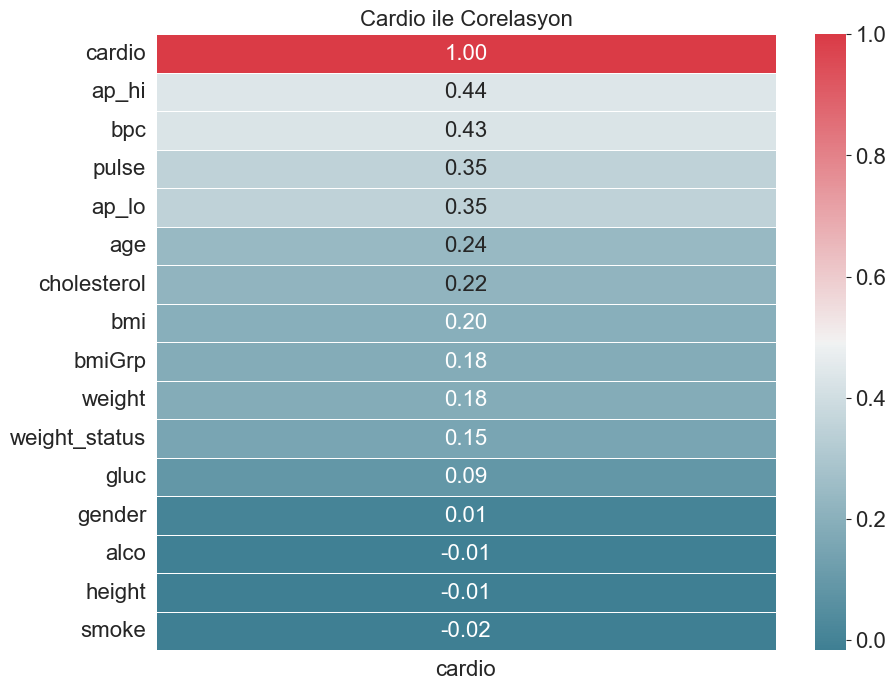

In [57]:
corr = df.corr()[['cardio']].sort_values(by='cardio', ascending=False)

# Renk paletini tanımlayın
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap oluşturun
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title("Cardio ile Corelasyon")
plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68253 entries, 0 to 68252
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            68253 non-null  float64
 1   gender         68253 non-null  int64  
 2   height         68253 non-null  float64
 3   weight         68253 non-null  float64
 4   ap_hi          68253 non-null  float64
 5   ap_lo          68253 non-null  float64
 6   cholesterol    68253 non-null  int64  
 7   gluc           68253 non-null  int64  
 8   smoke          68253 non-null  int64  
 9   alco           68253 non-null  int64  
 10  cardio         68253 non-null  int64  
 11  bmi            68253 non-null  float64
 12  bmiGrp         68253 non-null  float64
 13  pulse          68253 non-null  float64
 14  bpc            68253 non-null  int32  
 15  weight_status  68253 non-null  float64
dtypes: float64(9), int32(1), int64(6)
memory usage: 8.1 MB


In [59]:
# Check the number of missing values in the 'bpc' column
print(df['bpc'].isnull().sum())

# Calculate the mean of the 'bpc' column
mean_bpc = df['bpc'].mean()

# Fill the missing values in the 'bpc' column with the mean
df['bpc'].fillna(mean_bpc, inplace=True)

# Check if the missing values have been filled
print(df['bpc'].isnull().sum())


0
0


In [ ]:
df.drop('alco',axis=1,inplace=True)
df.drop('smoke',axis=1,inplace=True)
#df.drop('weight_status',axis=1,inplace=True)
#df.drop('active',axis=1,inplace=True)

# MODELLING

In [60]:
#scale edirik

column_names = df.columns  # Store the column names

scaler = RobustScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=column_names)
df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,cardio,bmi,bmiGrp,pulse,bpc,weight_status
0,-0.356422,1.0,0.269358,-0.588235,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,-0.780581,-0.480111,-1.0,0.0,0.0
1,0.143987,0.0,-0.838480,0.764706,1.00,1.0,2.0,0.0,0.0,0.0,1.0,1.216314,0.519889,1.0,1.0,1.0
2,-0.229888,0.0,0.000000,-0.470588,0.50,-1.0,2.0,0.0,0.0,0.0,1.0,-0.488686,-0.480111,2.0,0.5,0.0
3,-0.566403,1.0,0.358076,0.588235,1.50,2.0,0.0,0.0,0.0,0.0,1.0,0.372237,0.000000,1.0,1.0,1.0
4,-0.607036,0.0,-0.838480,-0.941176,-1.00,-1.5,0.0,0.0,0.0,0.0,0.0,-0.580633,-0.480111,-0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68248,-0.125443,1.0,0.269358,0.235294,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.096143,0.000000,0.0,0.0,1.0
68249,0.791110,0.0,-0.648044,2.088235,1.00,1.0,1.0,1.0,0.0,0.0,1.0,2.117852,0.519889,1.0,1.0,1.0
68250,-0.172893,1.0,1.547827,1.941176,2.50,1.0,2.0,0.0,0.0,1.0,1.0,0.751462,0.519889,4.0,1.0,1.0
68251,0.744750,0.0,-0.182307,0.000000,0.75,0.0,0.0,1.0,0.0,0.0,1.0,0.123532,0.000000,1.5,0.5,0.0


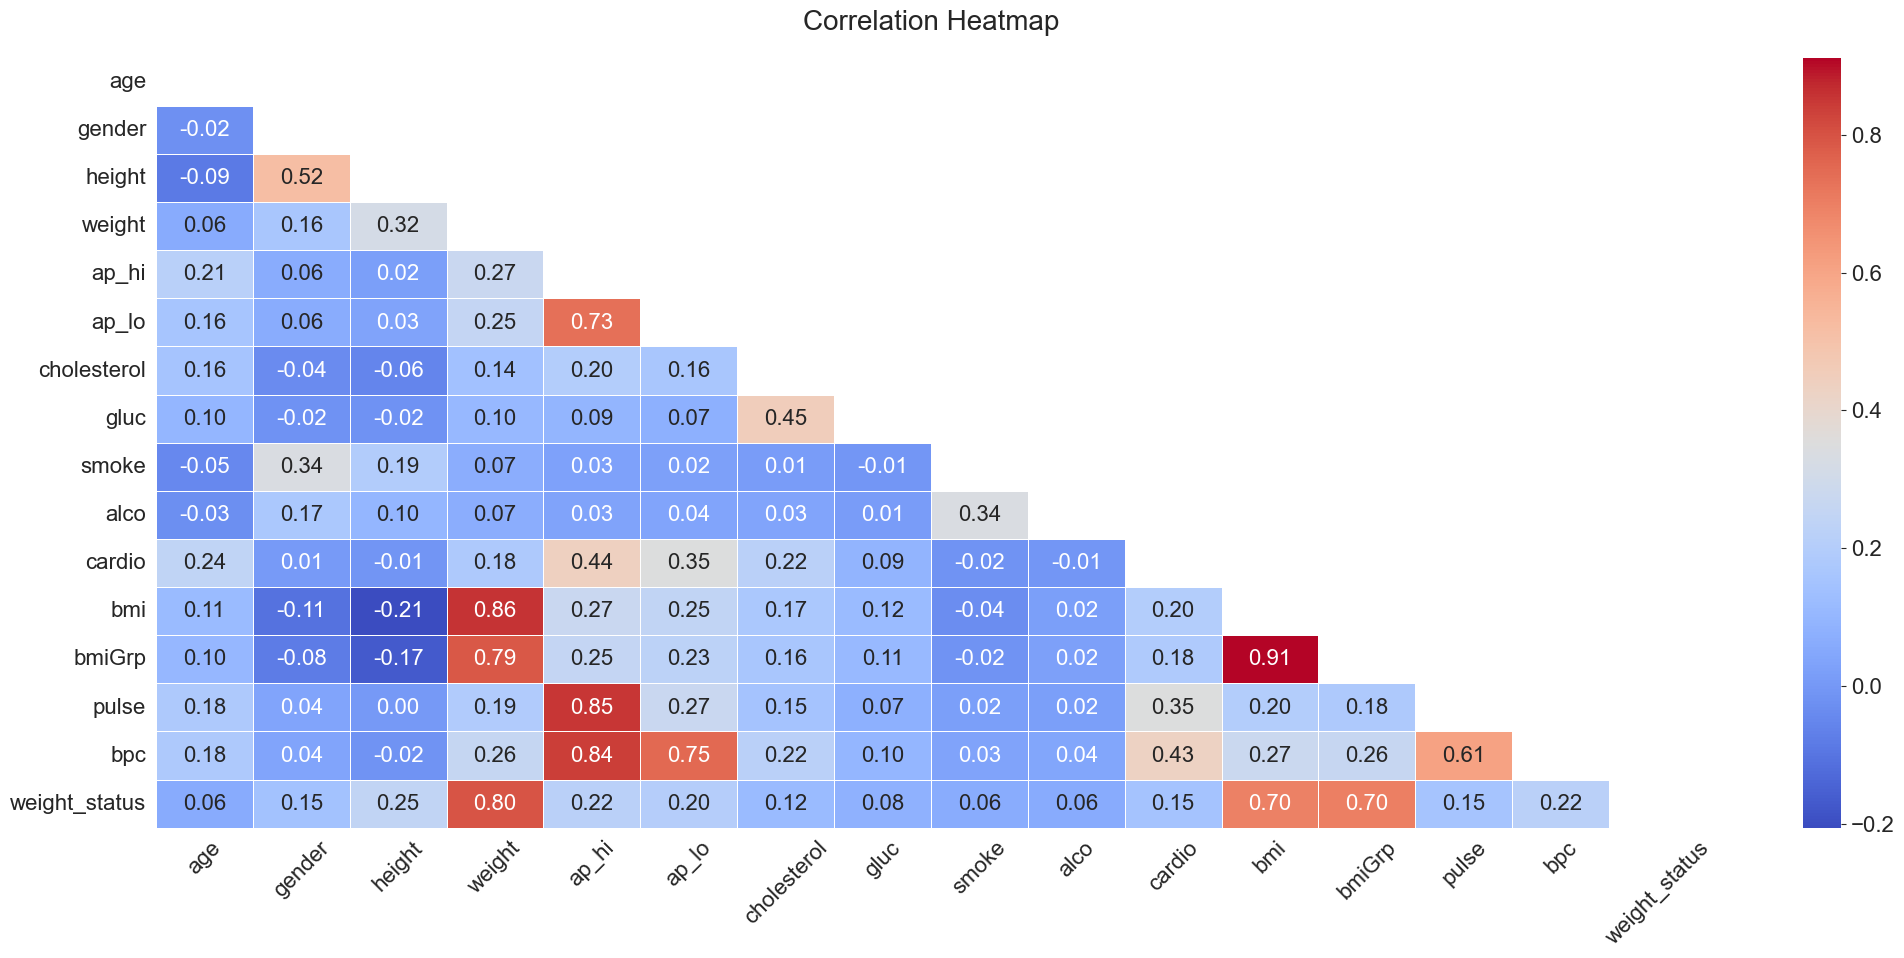

In [61]:

plt.figure(figsize=(25, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 20}, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [62]:
X=df.drop('cardio',axis=1)
y=df['cardio']

In [63]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30,stratify=y)

#

              precision    recall  f1-score   support

         0.0       0.65      0.80      0.72      8647
         1.0       0.73      0.56      0.64      8417

    accuracy                           0.68     17064
   macro avg       0.69      0.68      0.68     17064
weighted avg       0.69      0.68      0.68     17064





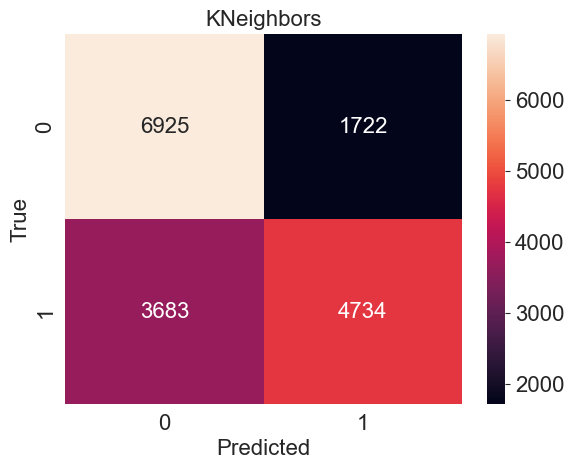

In [64]:
knn =KNeighborsClassifier()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
pram_dict = {"n_neighbors": range(1,5)}
gridsearch = GridSearchCV(knn, param_grid=pram_dict, cv=5)
gridsearch.fit(X_train_scaler, y_train)
predictions = gridsearch.predict(X_test_scaler)
gridsearch.best_params_
y_predKnn=gridsearch.predict(X_test_scaler)
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('KNeighbors');
plt.xlabel('Predicted');
plt.ylabel('True');

In [65]:
print("Accuracy : ",accuracy_score(y_test, y_predKnn))
print("Precision : ",precision_score (y_test, y_predKnn))
print("Recall : ",recall_score(y_test, y_predKnn))



Accuracy :  0.6832512892639475
Precision :  0.733271375464684
Recall :  0.5624331709635262


              precision    recall  f1-score   support

         0.0       0.65      0.64      0.65      8647
         1.0       0.64      0.64      0.64      8417

    accuracy                           0.64     17064
   macro avg       0.64      0.64      0.64     17064
weighted avg       0.64      0.64      0.64     17064





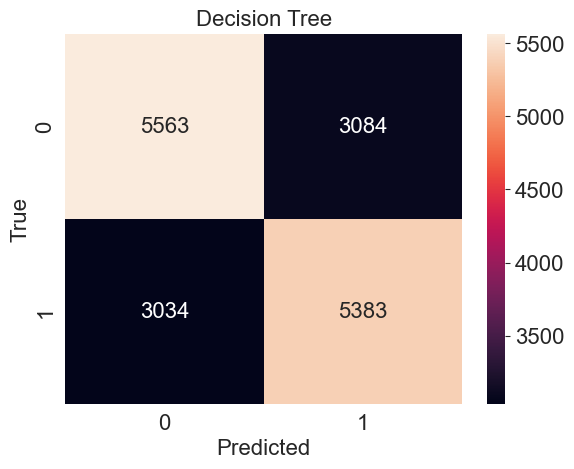

In [66]:
decision =DecisionTreeClassifier()
pram_dict1={"criterion":['gini','entropy']}
gridsearch = GridSearchCV(decision, param_grid=pram_dict1, cv=5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)
gridsearch.best_params_
y_predDecision=gridsearch.predict(X_test)
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Decision Tree');
plt.xlabel('Predicted');
plt.ylabel('True');

In [67]:
print("Accuracy : ",accuracy_score(y_test, y_predDecision))
print("precision : ",precision_score (y_test, y_predDecision))
print("recall : ",recall_score(y_test, y_predDecision))

Accuracy :  0.6414674167838725
precision :  0.6357623715601748
recall :  0.6395390281573007


              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75      8647
         1.0       0.76      0.66      0.71      8417

    accuracy                           0.73     17064
   macro avg       0.73      0.73      0.73     17064
weighted avg       0.73      0.73      0.73     17064





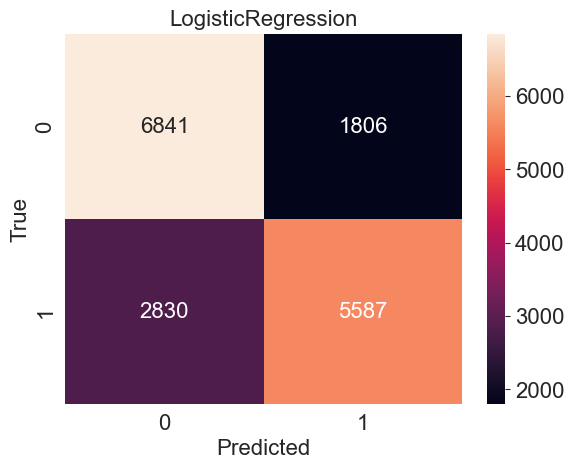

In [68]:
Logistic = LogisticRegression()
pram_dict1={"penalty":['l2'],"solver":['liblinear']}

gridsearch = GridSearchCV(Logistic, pram_dict1, cv = 5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)
gridsearch.best_params_
y_predLogistic=gridsearch.predict(X_test)
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('LogisticRegression');
plt.xlabel('Predicted');
plt.ylabel('True');

In [69]:
print("Accuracy : ",accuracy_score(y_test, y_predLogistic))
print("precision : ",precision_score (y_test, y_predLogistic))
print("recall : ",recall_score(y_test, y_predLogistic))

Accuracy :  0.7283169245194562
precision :  0.7557148654132287
recall :  0.6637756920518


              precision    recall  f1-score   support

         0.0       0.71      0.72      0.72      8647
         1.0       0.71      0.69      0.70      8417

    accuracy                           0.71     17064
   macro avg       0.71      0.71      0.71     17064
weighted avg       0.71      0.71      0.71     17064





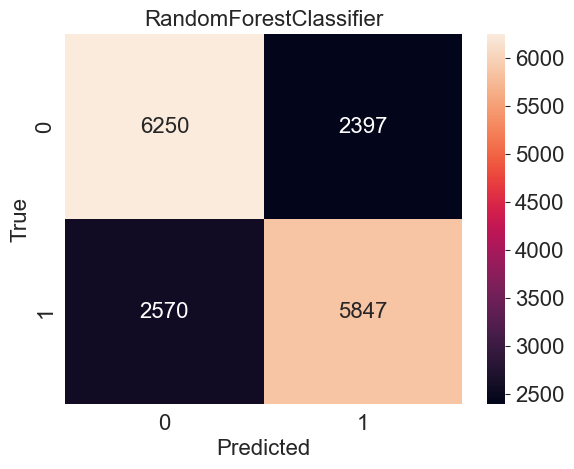

In [70]:
RandomForest = RandomForestClassifier()
max_features= ['sqrt']
n_estimators=[100]
bootstrap = [True]
random_state=[199]
param_grid=dict(n_estimators=n_estimators,max_features=max_features,bootstrap=bootstrap,random_state=random_state )
gridsearch = GridSearchCV(RandomForest,param_grid,cv = 5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)

gridsearch.best_params_
y_predRandom=gridsearch.predict(X_test)
#Reporta
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('RandomForestClassifier');
plt.xlabel('Predicted');
plt.ylabel('True');

In [71]:
print("Accuracy : ",accuracy_score(y_test, y_predRandom))
print("Pccuracy : ",precision_score (y_test, y_predRandom))
print("Recall : ",recall_score(y_test, y_predRandom))


Accuracy :  0.708919362400375
Pccuracy :  0.7092430858806404
Recall :  0.6946655577996911


              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75      8647
         1.0       0.76      0.68      0.72      8417

    accuracy                           0.74     17064
   macro avg       0.74      0.74      0.73     17064
weighted avg       0.74      0.74      0.73     17064





Text(44.722222222222214, 0.5, 'True')

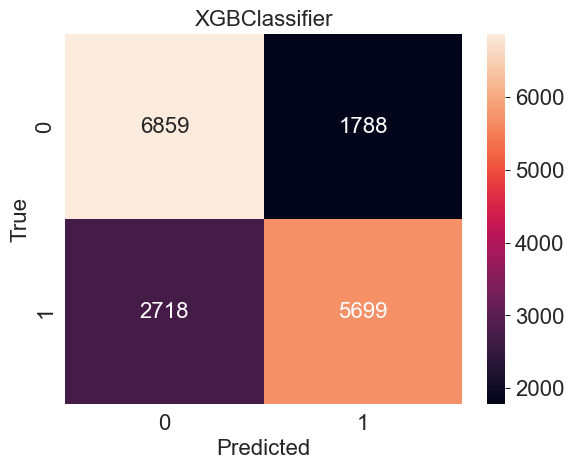

In [72]:
XGB = XGBClassifier()
n_estimators= range(100, 300, 50)
max_depth=range(5, 8)
learning_rate=[.01, .3]
parameters=dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)
gridsearch = GridSearchCV(XGB, parameters, cv = 10)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)
#predictions_train = gridsearch.predict(X_train)
gridsearch.best_params_
y_predXGB= gridsearch.predict(X_test)
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('XGBClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [74]:
print("Accuracy : ",accuracy_score(y_test, y_predXGB))
print("Pccuracy : ",precision_score (y_test, y_predXGB))
print("Recall : ",recall_score(y_test, y_predXGB))

Accuracy :  0.7359353023909986
Pccuracy :  0.7611860558301056
Recall :  0.6770820957585838


[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_s

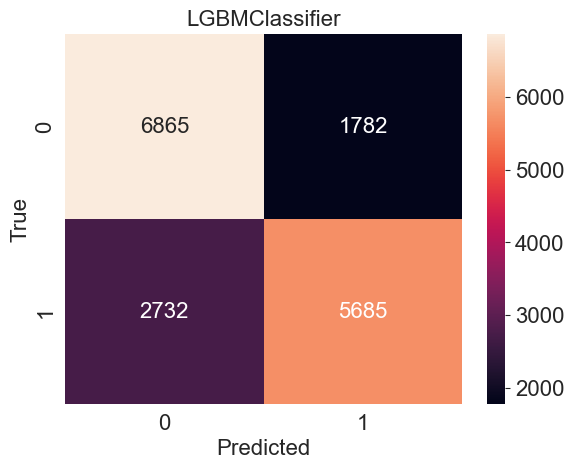

In [75]:
LGBM = LGBMClassifier()
boosting=['dart']
application= ['binary']
learning_rate= [0.05]
min_data_in_leaf=[20]
feature_fraction= [0.7]    
num_leaves=[41]
metric=['binary_loglossfeature_fraction']
drop_rate= [0.15]

parameters=dict(boosting=boosting, application=application,learning_rate=learning_rate,min_data_in_leaf=min_data_in_leaf,
feature_fraction=feature_fraction,num_leaves=num_leaves, metric=metric, drop_rate=drop_rate)

gridsearch = GridSearchCV(LGBM, parameters, cv = 5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)

gridsearch.best_params_
y_predLGBM=gridsearch.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('LGBMClassifier');
plt.xlabel('Predicted');
plt.ylabel('True');

In [ ]:
print("Accuracy : ",accuracy_score(y_test, y_predLGBM))
print("Pccuracy : ",precision_score (y_test, y_predLGBM))
print("Recall : ",recall_score(y_test, y_predLGBM))

Accuracy :  0.73300515705579
Pccuracy :  0.754314319588987
Recall :  0.6802898895093263


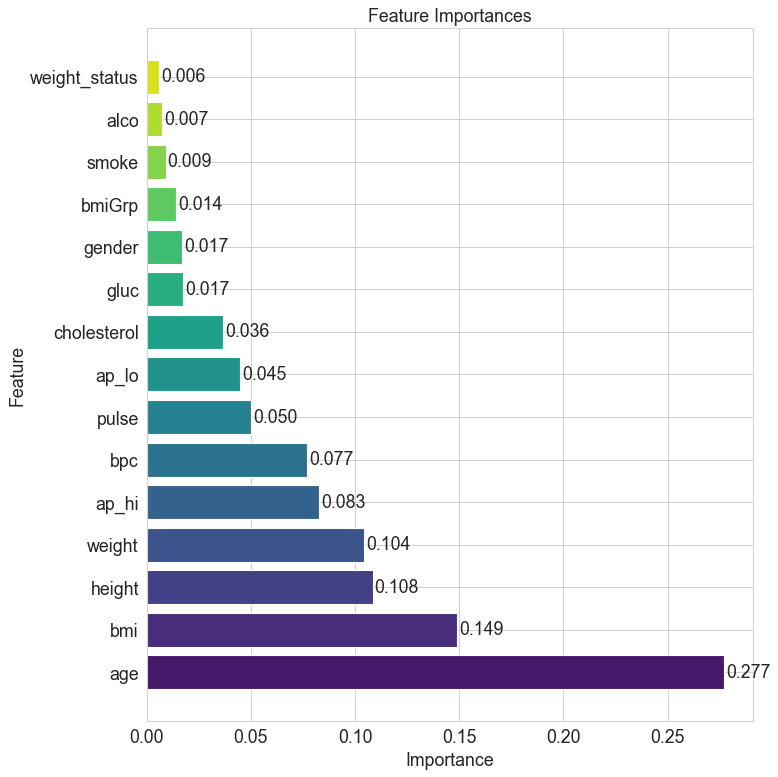

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Assuming you have already defined X_train and y_train
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X_train, y_train)
selected_features = X_train.columns[sel.get_support()]

model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt')
model.fit(X_train, y_train)

fi = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
fi = fi.sort_values('importance', ascending=False)

# Set a custom color palette
custom_colors = sns.color_palette('viridis', n_colors=len(fi))

plt.figure(figsize=(10, 10), dpi=80)
bars = plt.barh(fi['feature'], fi['importance'], color=custom_colors)

# Adding labels for feature importance values
for bar, importance in zip(bars, fi['importance']):
    plt.text(
        bar.get_width() + 0.001,  # Adjust the position for the label
        bar.get_y() + bar.get_height() / 2,
        f'{importance:.3f}',
        ha='left',
        va='center'
    )

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
# SGDClassifier()
# LogisticRegression()
# LinearSVC()

from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

model_params = {
    "sgd": {
        "model": SGDClassifier(),
        "params": {
            "alpha": [0.00001, 0.0001, 0.001, 0.03, 0.1],
            "class_weight": ["balanced", None]
        }
    },
    "logistic_regression": {
        "model": LogisticRegression(),
        "params": {
            "C": [1, 2, 5, 10, 15, 20]
        }
    },
    "linear_svc": {
        "model": LinearSVC(),
        "params": {
            "C": [1, 2, 5, 10, 15, 20], 
            "class_weight": ["balanced", None]
        }
    }
}


In [ ]:
RUN_GRID_SEARCH_CV = True


In [ ]:
if (RUN_GRID_SEARCH_CV):

    from sklearn.model_selection import GridSearchCV

    scores = []

    for model_name, mp in model_params.items():
        clf = GridSearchCV(estimator = mp["model"], param_grid=mp["params"], cv=10, scoring="accuracy", n_jobs=-1)
        clf.fit(X_train, y_train)
        scores.append({"model": model_name,
        "best_score": clf.best_score_, # Mean cross-validated score of the best_estimator
        "best_params": clf.best_params_
        })

    df_grid_search_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
    print(df_grid_search_scores)

                 model  best_score                                 best_params
0                  sgd    0.722382  {'alpha': 0.1, 'class_weight': 'balanced'}
1  logistic_regression    0.723261                                    {'C': 1}
2           linear_svc    0.722284             {'C': 10, 'class_weight': None}


In [ ]:
# if RUN_GRID_SEARCH_CV:
df_grid_search_scores

,model,best_score,best_params
0,sgd,0.722382,"{'alpha': 0.1, 'class_weight': 'balanced'}"
1,logistic_regression,0.723261,{'C': 1}
2,linear_svc,0.722284,"{'C': 10, 'class_weight': None}"


In [ ]:
svm_sgd = SGDClassifier(alpha=0.1, class_weight="balanced", random_state=1) # get object

In [ ]:
svm_sgd.fit(X_train, y_train) 

SGDClassifier(alpha=0.1, class_weight='balanced', random_state=1)

In [ ]:
# y_pred = svm_sgd.predict(X_test)
y_pred = svm_sgd.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.82      0.75     25941
         1.0       0.77      0.62      0.69     25248

    accuracy                           0.72     51189
   macro avg       0.73      0.72      0.72     51189
weighted avg       0.73      0.72      0.72     51189



In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC

# Best parameters for each model
best_params_sgd = {'alpha': 0.01, 'class_weight': 'balanced'}
best_params_lr = {'C': 15}
best_params_svc = {'C': 5, 'class_weight': None}

# Initialize the models with the best parameters
sgd_model = SGDClassifier(**best_params_sgd)
lr_model = LogisticRegression(**best_params_lr)
svc_model = LinearSVC(**best_params_svc)

# Train the models on the training data
sgd_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_sgd = sgd_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test)

# Evaluate the models' performance
from sklearn.metrics import classification_report, confusion_matrix

print("SGD Classifier:")
print(classification_report(y_test, y_pred_sgd))
print(confusion_matrix(y_test, y_pred_sgd))

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

print("Linear SVC:")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))


SGD Classifier:
              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74      8647
         1.0       0.76      0.62      0.68      8417

    accuracy                           0.71     17064
   macro avg       0.72      0.71      0.71     17064
weighted avg       0.72      0.71      0.71     17064

[[6953 1694]
 [3185 5232]]
Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75      8647
         1.0       0.75      0.66      0.71      8417

    accuracy                           0.73     17064
   macro avg       0.73      0.73      0.73     17064
weighted avg       0.73      0.73      0.73     17064

[[6833 1814]
 [2834 5583]]
Linear SVC:
              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75      8647
         1.0       0.76      0.66      0.70      8417

    accuracy                           0.73     17064
   macro avg       0.73  